In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston


In [3]:
dataset = load_boston()

x, t = dataset.data, dataset.target

columns = dataset.feature_names
# 特徴量の名前

type(x), x.shape  

(numpy.ndarray, (506, 13))

In [4]:
type(t), t.shape


(numpy.ndarray, (506,))

In [5]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df = pd.DataFrame(x, columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['Target'] = t
df.head()

# t→目的変数　　それ以外は説明変数

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#  numpy
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

In [9]:
# データの一部を確認用に使う。
# 学習用データセットとテスト用データセット分割する。
# ホールドアウト方法
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test = train_test_split(x, t, test_size=0.3, random_state=0)
x_train

len(x_train)

354

In [10]:
# sckit Learn を使用した重回帰分析　線形モデルを使う。
from sklearn.linear_model import LinearRegression



In [11]:
# Linear regression のインスタンスを作成
model = LinearRegression()

In [12]:
model

LinearRegression()

In [13]:
# モデル
model.fit(x_train, t_train)

LinearRegression()

In [14]:
model.coef_
# 学習後のパラメータ
# 十三個（入力変数の重みの値）


array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

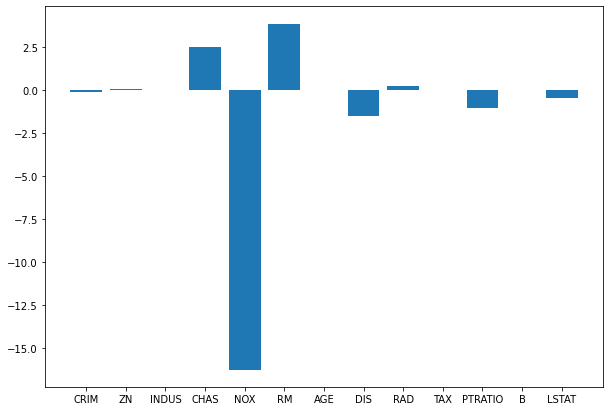

In [15]:
plt.figure(figsize=(10,7))
plt.bar(x = columns, height = model.coef_)
# それぞれの重みの大きさがわかる

In [16]:
model.intercept_
# 　バイアスの確認

37.93710774183228

In [17]:
# 決定係数の最大値１　１に近いほど良い
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}  ')


train score: 0.7645451026942549
test score: 0.6733825506400195  


In [30]:
# ここから推論を行う。本来だったら全く別のデータセットを渡すが
y = model.predict(x_test)
print(f'予測値： {y[0]}')
print (f'目標値：{t_test[0]}')

# 予測と実測値では乖離がある。
# 実際中身を予測値と比べることでどれほどの精度で予測ができているのかがわかる。
# 学習したモデルは、学習用データセットには適合できているが、新しいデータに対しては、良い精度で予測ができていないという結論になる。→過学習
# 過学習を抑制するためには、データセットのサンプル数を増やす。　ハイパーパラメータを調整する。他のアルゴリズムを使用する。

# この差をどのように判断するか。



予測値： 24.93570789857678
目標値：22.6


<AxesSubplot:>

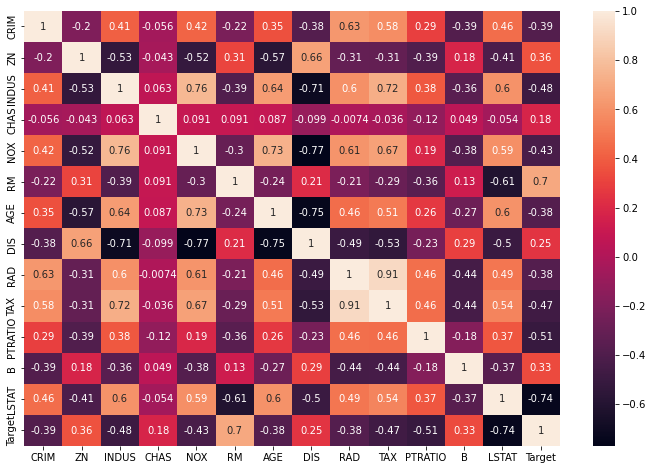

In [20]:
df_corr = df.corr()
plt.figure(figsize=(12, 8 ))
sns.heatmap(df_corr.iloc[:20, :20], annot=True)

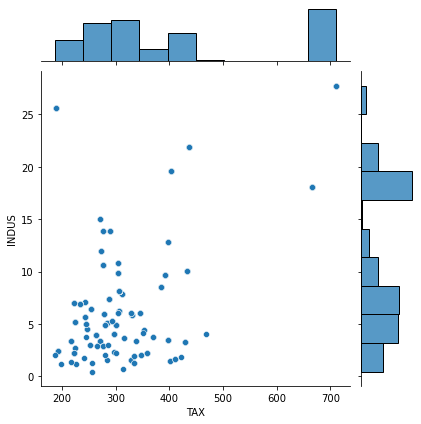

In [21]:
sns.jointplot(x='TAX', y='INDUS',data=df);

# 説明変数での相関関係の問題はどこにあるのか　。


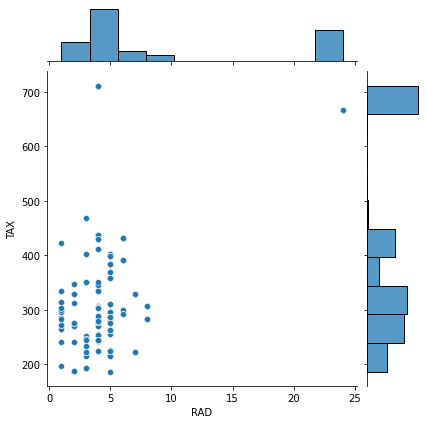

In [24]:
sns.jointplot(x='RAD', y='TAX',data=df);
# 相関関係